In [ ]:
from codes.python import load_database,ECG_denoising
from codes.python import QRS_detector
import numpy as np
from scipy import signal
from scipy.signal import savgol_filter
import operator
from numpy import array
import sys
import csv
import os
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing, plot
from codes.python import heartbeat_segmentation as shs
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import pywt
from biosppy.signals import ecg
from sklearn import metrics
#import waipy
import operator
from codes.python import ecg_waveform_extractor as waveform
import time as system_time
from scipy import stats
import warnings
import termcolor as colored
from math import*

In [2]:
def average(numbers):
    return float(sum(numbers)) / len(numbers)

In [3]:
mitdb = load_database.load_mitdb()
mitdb.segment_beats()

C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/100
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/101
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/101.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/101.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/101pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/102
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/102.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/102.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/102pt

C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/201.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/201pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/202
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/202.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/202.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/202pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/203
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/203.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/203.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/203pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/205
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/205

Filtered MLII records from : 102
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 102 completes.
Start segmenting records: 103
Filtered MLII records from : 103
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 103 completes.
Start segmenting records: 104
Filtered MLII records from : 104
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 104 completes.
Start segmenting records: 105
Filtered MLII records from : 105
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 105 completes.
Start segmenting records: 106
Filtered MLII records from : 106
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 106 completes.
Start segmenting records: 107
Filtered MLII records from : 107
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 107 completes.
Start segmenting records: 108
Filtered MLII records from : 108
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 108 completes.
Start segmentin

In [ ]:
for i in range(0,len(mitdb.patient_records)):
    print(mitdb.patient_records[i].filename, i)
    

In [5]:
mit100 = load_database.load_patient_record("mitdb","100")
mit100.set_segmented_beats_r_pos(winL=100,winR=200)
filtere_MLII = mit100.filtered_MLII
beats, poses = shs.segment(filtere_MLII,100,50,50,25)
assert len(beats) == 100
assert max(filtere_MLII[beats]) == filtere_MLII[poses],"max(pos) isn't equal to r_pos "
count = 0
assert shs.check_class_AAMI('N',-1) == 0

for patient in mitdb.patient_records:
    patient.set_r_properties_MLII()
    patient.set_Q_S_points_MLII()



    

    



C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/100
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
Start segmenting records: 100
Filtered MLII records from : 100
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 100 completes.
Processing file: 100
Patient file:  100 begins
Patient file:  100 processing end
Done proecessing: 100
Processing file: 100
Patient file:  100 begins
Done proecessing: 100
Processing file: 101
Patient file:  101 begins
Patient file:  101 processing end
Done proecessing: 101
Processing file: 101
Patient file:  101 begins
Done proecessing: 101
Processing file: 102
Patient file:  102 begins
Patient file:  102 processing end
Done proecessing: 102
Processing file: 102
Patient file:  102 begins
Done proecessing: 102
Proc

Done proecessing: 231
Processing file: 232
Patient file:  232 begins
Patient file:  232 processing end
Done proecessing: 232
Processing file: 232
Patient file:  232 begins
Done proecessing: 232
Processing file: 233
Patient file:  233 begins
Patient file:  233 processing end
Done proecessing: 233
Processing file: 233
Patient file:  233 begins
Done proecessing: 233
Processing file: 234
Patient file:  234 begins
Patient file:  234 processing end
Done proecessing: 234
Processing file: 234
Patient file:  234 begins
Done proecessing: 234


In [26]:
count = 0
for patient in mitdb.patient_records:
    
    
    print(patient.filename, count)
    count += 1
    assert len(patient.original_R_pos) == len(patient.segmented_R_pos) == len(patient.segmented_beat_time) == len(patient.segmented_beat_index),"Unequal length, should be equal in length"
    assert len(patient.segmented_beat_1) == len(patient.segmented_class_ID) == len(patient.segmented_beat_class),"Unequal lens, should be equal in length"
    
    
    assert len(patient.Q_points) == len(patient.S_points),"Unequal lens, should be equal in length"
    assert len(patient.segmented_R_pos) == len(patient.S_points),"Unequal lens, should be equal in length"
    r_properties = patient.R_pos_properites
    q_props = patient.Q_points_properites
    s_props = patient.S_points_properites
    assert len(r_properties["height"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert len(q_props["height"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert len(s_props["height"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"

    assert average(r_properties["height"]) < 3,"Average height of r_peak for patient "+ patient.filename+ " is greater than 3"
    assert average(q_props["height"]) < 3,"Average height of q_peak for patient "+ patient.filename+ " is greater than 1"
    assert average(s_props["height"]) < 3,"Average height of s_peak for patient "+ patient.filename+ " is greater than 1"

    assert average(r_properties["height"]) > 0.5,"Average height of r_peak for patient " +patient.filename+ " is less than 0.5"
    assert average(q_props["height"]) > 0,"Average height of q_peak for patient " +patient.filename+ " is less than 0"
    assert average(s_props["height"]) > 0,"Average height of s_peak for patient " +patient.filename+ " is less than 0"
    
    assert min(r_properties["height"]) >= 0,"Min height of r_peak for patient " +patient.filename+ " is less than 0"
    assert min(q_props["height"]) >= 0,"Min height of q_peak for patient " +patient.filename+ " is less than 0"
    assert min(s_props["height"]) >= 0,"Min height of q_peak for patient " +patient.filename+ " is less than 0"

    assert max(r_properties["height"]) < 5,"Max height of r_peak for patient " +patient.filename+ " is greater than 5"
    assert max(q_props["height"]) < 5,"Max height of q_peak for patient " +patient.filename+ " is greater than 3"
    assert max(s_props["height"]) < 5,"Max height of s_peak for patient " +patient.filename+ " is greater than 3"

    x ,y  = np.unique(r_properties["height"], return_counts=True) # counting occurrence of each loan
    index = np.where(x==0)
    index = np.asarray(index)
    if(index.size != 0):
        
        if(y[index[0]] > 20):
            warnings.warn("height equal to 0 number is greater then 20 in " + patient.filename + " record with 0 height number of "+ str(y[index[0]]))
        
    
    assert len(r_properties["durations"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert len(q_props["durations"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert len(s_props["durations"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"

    assert average(r_properties["durations"]) < 0.09,"Average duration of r_peak for patient "+ patient.filename+ " is greater than 0.09"
    assert average(q_props["durations"]) < 0.09,"Average duration of q_peak for patient "+ patient.filename+ " is greater than 0.05"
    assert average(s_props["durations"]) < 0.09,"Average duration of s_peak for patient "+ patient.filename+ " is greater than 0.05"

    assert average(r_properties["durations"]) > 0.01,"Average durations of r_peak for patient " +patient.filename+ " is less than 0.01"
    assert average(q_props["durations"]) > 0.001,"Average durations of q_peak for patient " +patient.filename+ " is less than 0.001"
    assert average(s_props["durations"]) > 0.001,"Average durations of s_peak for patient " +patient.filename+ " is less than 0.001"

    assert min(r_properties["durations"]) >= 0,"Min durations of r_peak for patient " +patient.filename+ " is less than 0"
    assert min(q_props["durations"]) >= 0,"Min durations of q_peak for patient " +patient.filename+ " is less than 0"
    assert min(s_props["durations"]) >= 0,"Min durations of s_peak for patient " +patient.filename+ " is less than 0"

    assert max(r_properties["durations"]) < 0.3,"Max durations of r_peak for patient " +patient.filename+ " is greater than 0.3"
    assert max(q_props["durations"]) < 0.3,"Max durations of q_peak for patient " +patient.filename+ " is greater than 0.2"
    assert max(s_props["durations"]) < 0.3,"Max durations of s_peak for patient " +patient.filename+ " is greater than 0.2"

    x ,y  = np.unique(r_properties["durations"], return_counts=True) # counting occurrence of each loan
    index = np.where(x==0)
    index = np.asarray(index)
    if(index.size != 0):
        
        if(y[index[0]] > 20):
            warnings.warn("durations equal to 0 number is greater then 20 in " + patient.filename + " record with 0 durations number of "+ str(y[index[0]]))
        
    
    assert len(r_properties["onset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"   
    assert len(q_props["onset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"   
    assert len(s_props["onset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"   

    assert len(r_properties["offset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert len(q_props["offset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"   
    assert len(s_props["offset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length" 
    
    #print(r_properties["offset"])

    for i in range(1,len(patient.segmented_R_pos)-1):
        assert len(patient.segmented_beat_1[i])==len(patient.segmented_beat_1[i+1]), "Unequal lens, should be equal in length"
        assert len(patient.segmented_beat_time[i]) == len(patient.segmented_beat_time[i+1]), "Unequal lens, should be equal in length"
        assert len(patient.segmented_beat_1[i])==len(patient.segmented_beat_time[i]), "Unequal lens, should be equal in length"
        assert patient.segmented_R_pos[i] <= patient.segmented_R_pos[i+1], "the later r_pos is smaller " + patient.filename + " R_peak: " + str(patient.segmented_R_pos[i]) +" "+  str(patient.segmented_R_pos[i+1])
        assert len(q_props["amplitudes"][i]) == 10, "The list of amplitudes is not equal to 10 in patient " + patient.filename + " "+ str(len(q_props["amplitudes"][i]))
        assert len(r_properties["amplitudes"][i]) == 10, "The list of amplitudes is not equal to 10 in patient " + patient.filename + " "+ str(len(r_properties["amplitudes"][i]))
        assert len(s_props["amplitudes"][i]) == 10, "The list of amplitudes is not equal to 10 in patient " + patient.filename + " "+ str(len(s_props["amplitudes"][i]))

        assert r_properties["peaks"][i] <=  patient.segmented_R_pos[i]+6,"the peak position is not in range : Patient " + patient.filename+ " R_peak: " + str(r_properties["peaks"][i])
        assert r_properties["peaks"][i] >=  patient.segmented_R_pos[i]-6,"the peak position is not in range : Patient " + patient.filename+ " R_peak: " + str(r_properties["peaks"][i])
        assert r_properties["peaks"][i] <=  r_properties["peaks"][i+1], "the later peak position is smaller: Patient " + patient.filename+ " R_peak: " + str(r_properties["peaks"][i]) 
        if(r_properties["offset"][i] < r_properties["peaks"][i]):
            warnings.warn("r_peak is larger than offset. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(r_properties["onset"][i] > r_properties["peaks"][i]):
            warnings.warn("onset is larger than r_peak. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(r_properties["onset"][i] > r_properties["onset"][i+1]):
            warnings.warn("the later onset is larger than current onset. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(r_properties["offset"][i] > r_properties["offset"][i+1]):
            warnings.warn("the later offset is larger than current offset. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        #  assert max()
        
        point_list = list(range(patient.segmented_R_pos[i-1],patient.segmented_R_pos[i]))
        if((patient.Q_points[i] in point_list)==False):
            warnings.warn("the current q point is not in the range current  pre_r . File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(patient.Q_points[i+1] in point_list):
            warnings.warn("the later q point is in the range of the  current q_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        if(patient.Q_points[i-1] in point_list):
            warnings.warn("the former q point is in the range of the  current q_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        if(patient.Q_points[i] > patient.Q_points[i+1]):
            warnings.warn("the current q point is greater than the later q_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
       
    
        
        point_list_2 = list(range(patient.segmented_R_pos[i],patient.segmented_R_pos[i+1]))
        if((patient.S_points[i] in point_list_2)==False):
            warnings.warn("the current S point is not in the range current  post_r . File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        if(patient.S_points[i+1] in point_list_2):
            warnings.warn("the later s point is in the range of the  current s_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        if(patient.S_points[i-1] in point_list_2):
            warnings.warn("the former s point is in the range of the  current s_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
         
        if(patient.S_points[i] > patient.S_points[i+1]):
            warnings.warn("the current s point is greater than the later s_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        #assert r_properties["onset"][i]  <= r_properties["peaks"][i],"the peak is smaller than onset in " + patient.filename + " onset: " + str(r_properties["onset"][i]) +" peak: "+  str(r_properties["peaks"][i]) 
        #assert r_properties["offset"][i] >= r_properties["peaks"][i],"the peak is larger than offset in " + patient.filename + " offset: " + str(r_properties["offset"][i]) +" peak: "+  str(r_properties["peaks"][i])
       
    #peak,properties= peak_properties_extractor(mit100.filtered_MLII)


100 0
101 1


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 101. r_peak: 114682
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: UserWarning: the current q point is not in the range current  pre_r . File name: 101. r_peak: 114700


102 2
103 3
104 4


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 104 record with 0 height number of [24]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 104 record with 0 durations number of [23]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 104. r_peak: 59677
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: UserWarning: the current S point is not in the range current  post_r . File name: 104. r_peak: 59677
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: UserWarning: the current q point is not in the range current  pre_r . File name: 104. r_peak: 59677
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:128: UserWarning: the former s point is in the range of the  current s_point. 

105 5


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 105 record with 0 height number of [50]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 105 record with 0 durations number of [46]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: UserWarning: the current S point is not in the range current  post_r . File name: 105. r_peak: 371684
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:128: UserWarning: the former s point is in the range of the  current s_point. File name: 105. r_peak: 371711
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 105. r_peak: 372942
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: UserWarning: the current q point is not in the range current  pre_r

106 6
107 7
108 8


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: UserWarning: the current S point is not in the range current  post_r . File name: 108. r_peak: 280501
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:128: UserWarning: the former s point is in the range of the  current s_point. File name: 108. r_peak: 280515
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 108. r_peak: 334192
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: UserWarning: the current S point is not in the range current  post_r . File name: 108. r_peak: 334192
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: UserWarning: the current q point is not in the range current  pre_r . File name: 108. r_peak: 334207
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:128: UserWarning: the former s point is in the range of the  current s_po

109 9
111 10
112 11
113 12
114 13
115 14


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 115. r_peak: 585808
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: UserWarning: the current S point is not in the range current  post_r . File name: 115. r_peak: 585808
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: UserWarning: the current q point is not in the range current  pre_r . File name: 115. r_peak: 585816
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:128: UserWarning: the former s point is in the range of the  current s_point. File name: 115. r_peak: 585816
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 115. r_peak: 591340
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: UserWarning: the current S point is not in the range current  post_

116 15
117 16
118 17
119 18


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 119 record with 0 height number of [48]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 119 record with 0 durations number of [47]


121 19
122 20
123 21
124 22
200 23


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 200 record with 0 height number of [46]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 200 record with 0 durations number of [44]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 200. r_peak: 347947
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: UserWarning: the current S point is not in the range current  post_r . File name: 200. r_peak: 347947
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: UserWarning: the current q point is not in the range current  pre_r . File name: 200. r_peak: 347947
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:128: UserWarning: the former s point is in the range of the  current s_poin

201 24
202 25
203 26


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 203 record with 0 height number of [36]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 203 record with 0 durations number of [32]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: UserWarning: the later offset is larger than current offset. File name: 203. r_peak: 329298
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 203. r_peak: 329298
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: UserWarning: the current q point is not in the range current  pre_r . File name: 203. r_peak: 329321
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: UserWarning: the current S point is not in the range current  post_r . File name

205 27
207 28


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 207 record with 0 height number of [115]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 207 record with 0 durations number of [110]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 207. r_peak: 14669
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: UserWarning: the current q point is not in the range current  pre_r . File name: 207. r_peak: 14690


208 29


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 208 record with 0 height number of [50]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 208 record with 0 durations number of [47]


209 30
210 31
212 32
213 33
214 34
215 35


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: UserWarning: the current S point is not in the range current  post_r . File name: 215. r_peak: 64520
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:128: UserWarning: the former s point is in the range of the  current s_point. File name: 215. r_peak: 64556
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: UserWarning: the current S point is not in the range current  post_r . File name: 215. r_peak: 443163
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:128: UserWarning: the former s point is in the range of the  current s_point. File name: 215. r_peak: 443185


217 36


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 217 record with 0 height number of [42]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 217 record with 0 durations number of [39]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 219 record with 0 height number of [22]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 219 record with 0 durations number of [21]


219 37


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: UserWarning: the current S point is not in the range current  post_r . File name: 219. r_peak: 437726
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: UserWarning: the current s point is greater than the later s_point. File name: 219. r_peak: 437726
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:128: UserWarning: the former s point is in the range of the  current s_point. File name: 219. r_peak: 437753
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 219. r_peak: 500485
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: UserWarning: the current S point is not in the range current  post_r . File name: 219. r_peak: 500485
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: UserWarning: the current s point is greater than the later s_point. Fi

220 38
221 39


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: UserWarning: the current S point is not in the range current  post_r . File name: 221. r_peak: 416045
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:128: UserWarning: the former s point is in the range of the  current s_point. File name: 221. r_peak: 416080


222 40


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 222 record with 0 height number of [30]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 222 record with 0 durations number of [28]


223 41
228 42


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 228 record with 0 height number of [21]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: UserWarning: the current S point is not in the range current  post_r . File name: 228. r_peak: 15805
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:128: UserWarning: the former s point is in the range of the  current s_point. File name: 228. r_peak: 15845


230 43


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 230 record with 0 height number of [35]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 230 record with 0 durations number of [26]


231 44
232 45
233 46
234 47


In [4]:
mit100 = load_database.load_patient_record("mitdb","100")
mit100.set_segmented_beats_r_pos(winL=100,winR=200)
filtere_MLII = mit100.filtered_MLII
sig = mit100.filtered_MLII[0:500]
sig_savgol = savgol_filter(sig,41,9)

C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/100
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
Start segmenting records: 100
Filtered MLII records from : 100
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 100 completes.


Patient file:  100 begins
0.0019999999999527063


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


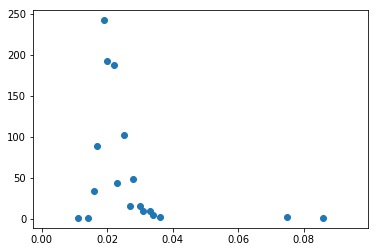

array([   359,    653,    936, ..., 649222, 649475, 649724], dtype=int64)

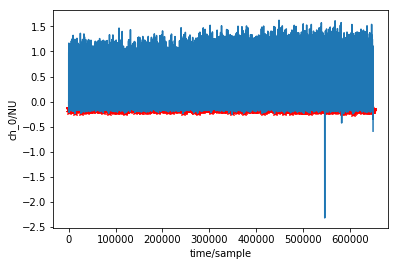

In [15]:
qrs_durations = []
high_qrs = []
for i in range(0, len(mit100.segmented_R_pos)):
    qrs_duration = round(sub_signal_interval(mit100.time, q_points[i], s_points[i],0),3)
    
    qrs_durations.append(qrs_duration)
    if(qrs_duration>0.14):
        print(mit100.segmented_R_pos[i], qrs_duration, q_points[i], s_points[i])

546793 0.184 546775 546841


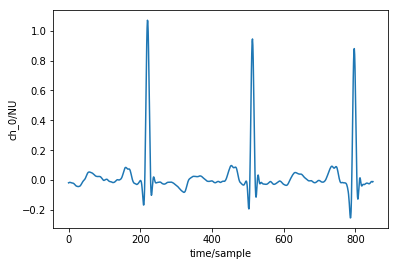

In [16]:
start_point = 150
end_point = 1000
q=546775
s=546841
q_point = origin_to_new_point(start_point,q)
s_point = origin_to_new_point(start_point,s)
annotation = np.asarray([q_point,s_point])
sig = mit100.filtered_MLII[start_point:end_point]
sig = savgol_filter(sig,41,9)
wfdb.plot_items(signal=sig)


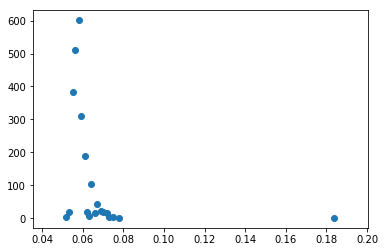

In [17]:
x ,y  = np.unique(qrs_durations, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)

In [182]:
def average(numbers):
    return float(sum(numbers)) / len(numbers)
def peak_properties_extractor(sig,start_point=None,end_point=None,height=None, distance=None, width = None, plateau_size=None):
    sig = sig[start_point:end_point]
    peaks,properties  = np.asarray(signal.find_peaks(sig, height=height, distance=distance,width=width,plateau_size=plateau_size))
    return peaks,properties

def point_transform_to_origin(por,point):
    point_from_origin = por + point 
    return point_from_origin

def origin_to_new_point(por,point_from_origin):
    point = point_from_origin - por
    return point

def peak_duration(time,right_edge, left_edge,point_from_origin):
    right_edge = point_transform_to_origin(point_from_origin,right_edge)
    left_edge = point_transform_to_origin(point_from_origin,left_edge)
    
    return float(time[right_edge]-time[left_edge])

def sub_signal_interval(time, start_point, end_point,point_from_origin):
    start_point = point_transform_to_origin(point_from_origin,start_point)
    end_point = point_transform_to_origin(point_from_origin,end_point)
    
    return float(time[end_point]-time[start_point])

def peak_height(signal, peak, prominence,point_from_origin):
    peak = point_transform_to_origin(point_from_origin,peak)
    height = signal[peak]-(signal[peak] - prominence)
    return height

def area_under_curve(signal,time,samples,point_from_origin):
    samples = [point_transform_to_origin(i,point_from_origin) for i in samples]
    time = np.asarray(time)
    amplitude = np.asarray(signal)
    area = metrics.auc(time[samples],amplitude[samples])
    return area

def amplitude(signal,samples,point_from_origin):
    samples = [point_transform_to_origin(i,point_from_origin) for i in samples]
    signal = np.asarray(signal)
    amplitudes = signal[samples]
    return amplitudes

def find_Q_point(signal,time, R_peaks, time_limit = 0.01,limit=50):
    num_peak = len(R_peaks)
    Q_points = []   
    for i in range(num_peak):
        r_peak = R_peaks[i]
        point = r_peak
        if point-1 >= len(signal):
            
            break
        
        if(signal[point] >= 0 ):
            while point >= R_peaks[i] - limit and signal[point] >= signal[point - 1] or abs(time[r_peak]-time[point]) <= time_limit:             
                point -= 1
                if point >= len(signal):
                    break
        else:
            
            while point >= R_peaks[i] - limit and abs(signal[point]) >= abs(signal[point - 1]) or abs(time[r_peak]-time[point]) <= time_limit:             
                point -= 1
                if point <= len(signal):
                    break
        
        Q_points.append(point)
                        
    return np.asarray(Q_points)

# only works with filtered leads 
def find_S_point(signal,time, R_peaks, time_limit = 0.01, limit=50):
    num_peak = len(R_peaks)
    S_points = []   
    for i in range(num_peak):
        
        r_peak = R_peaks[i]
        point = r_peak
        if point+1 >= len(signal):
           
            break
        
        if(signal[point] >= 0 ):
            while point <= R_peaks[i] + limit and signal[point] >= signal[point + 1] or abs(time[point]-time[r_peak]) <= time_limit:             
                point += 1
                if point >= len(signal):
                   
                    break
        else:
            
            while  point <= R_peaks[i] + limit and abs(signal[point]) >= abs(signal[point + 1]) or abs(time[point]-time[r_peak]) <= time_limit:             
                point += 1
                if point >= len(signal):
                    break
        
        S_points.append(point)
                        
    return np.asarray(S_points)     

def p_and_t_peak_properties_extractor(patient,time_limit_from_r=0.1,sample_from_point=[5,5], to_area=False,to_savol=False, Order=9,window_len=31, left_limit=50,right_limit=50, distance=1, width=[0,100],plateau_size=[0,100]):
    p_peaks = []
    p_heights = []
    p_durations = []
    p_areas = []
    p_onset = []
    p_offset = []
    p_amps = []
    p_promi = []
    sigs = []
    
    t_peaks = []
    t_heights = []
    t_durations = []
    t_areas = []
    t_onset = []
    t_offset = []
    t_amps = []
    t_promi = []
    
    p_positives = []
    p_negatives = []
    t_positives = []
    t_negatives = []
    
    
    time = patient.time
    count = 0
    print("Patient file: ",patient.filename, "begins")
    
    if(patient.filtered_MLII == []):
        print("Please filter the signal")
        return
    if(patient.segmented_R_pos == []):
        print("please segment the signal to find R peak")
        return
    
    
    

    r_peaks = patient.segmented_R_pos
    q_peaks = find_Q_point(patient.filtered_MLII,patient.time, r_peaks, time_limit = 0.01,limit=50)
    s_peaks = find_S_point(patient.filtered_MLII,patient.time, r_peaks, time_limit = 0.01,limit=50)
    #q_peaks = patient.Q_points_properites["peaks"]
    #s_peaks = patient.S_points_properites["peaks"]
        
    first_r_sig = patient.filtered_MLII[q_peaks[0]-100:q_peaks[0]]
    last_r_sig = patient.filtered_MLII[s_peaks[len(s_peaks)-1]:s_peaks[len(s_peaks)-1]+100]
    
    pre_r_sig = first_r_sig
    start_pre_r = q_peaks[0]-100
    end_pre_r = q_peaks[0]
    post_r_sig = patient.filtered_MLII[s_peaks[0]:r_peaks[1]]
    start_post_r = s_peaks[0]
    end_post_r = r_peaks[1]
    
    for i in range(0,len(r_peaks)):
        ####pre_processing
        
        negative_pre = -pre_r_sig
        
        
        if(to_savol == True):
            pre_r_sig = savgol_filter(pre_r_sig,window_len,Order)
            negative_pre = savgol_filter(negative_pre,window_len,Order)

        peak,properties= peak_properties_extractor(pre_r_sig, distance=distance, width=width, plateau_size=plateau_size)
        neg_peak,neg_properties= peak_properties_extractor(negative_pre, distance=distance, width=width, plateau_size=plateau_size)
        #print(len(neg_peak),i,r_peaks[i], len(negative_pre))
        ########
        #######do operation to find the p wave
        
        abs_peak=[]
        abs_neg_peak = []
       
        
        point = 0
        duration = 0
        prominence = 0
        height = 0
        amp=0
        area=0
        offset=0
        onset = 0        
        point_neg=0
        duration_neg=0
        prominence_neg=0
        height_neg=0
        amp_neg=0
        area_neg=0
        offset_neg=0
        onset_neg = 0
        left=0
        right= 0
        p_pos=0
        p_neg=0
        
        #print(len(abs_peak), "hi")
        if(len(peak) == 0 ):
           
            abs_peak=list(range(start_pre_r,end_pre_r))
            if(len(abs_peak) == 0):
                p_pos = round((start_pre_r+end_pre_r)/2,0)
            
            else:
                left, right= sudo_k_mean(abs_peak, time, patient.filtered_MLII)
                p_pos = highest_peak(right, patient.filtered_MLII)
            
            p_positives.append(p_pos)
            
        
        else:
            
            abs_peak = [point_transform_to_origin(p, start_pre_r) for p in peak]
            left, right= sudo_k_mean(abs_peak, time, patient.filtered_MLII)
            p_pos = highest_peak(right, patient.filtered_MLII)
            p_positives.append(p_pos)
            index_pos = find_index(abs_peak, p_pos)
            p_peak = peak[index_pos]
            point, duration, prominence, height, amp, area, offset, onset=find_values_in_properties(patient,patient.filtered_MLII ,p_peak, properties, index_pos, sample_from_point, start_pre_r,to_area)


        
        if(len(neg_peak) == 0 ):
            
            
            abs_neg_peak=list(range(start_pre_r,end_pre_r))
            if(len(abs_neg_peak) == 0):
                p_neg = round((start_pre_r+end_pre_r)/2,0)
            
            else:
                neg_left, neg_right = sudo_k_mean(abs_neg_peak, time, -patient.filtered_MLII)
                p_neg = highest_peak(neg_right, patient.filtered_MLII)
            p_negatives.append(p_neg)
        
        else:
            abs_neg_peak = [point_transform_to_origin(p, start_pre_r) for p in neg_peak]
            neg_left, neg_right = sudo_k_mean(abs_neg_peak, time, -patient.filtered_MLII)
            
            p_neg = highest_peak(neg_right,-patient.filtered_MLII)
            p_negatives.append(p_neg)
            index_neg = find_index(abs_neg_peak, p_neg)
            p_neg_peak = neg_peak[index_neg]
            point_neg, duration_neg, prominence_neg, height_neg, amp_neg, area_neg, offset_neg, onset_neg=find_values_in_properties(patient,-patient.filtered_MLII ,p_neg_peak, neg_properties, index_neg, sample_from_point, start_pre_r,to_area)

        
        
        ######Turn to normal peak to find the other properties      
            
            
        p_peaks.append((p_positives,p_negatives))
        p_heights.append((height,height_neg))
        p_durations.append((duration,duration_neg))
        p_areas.append((area,area_neg))
        p_onset.append((onset,onset_neg))
        p_offset.append((offset,offset_neg))
        p_amps.append((amp, amp_neg))
        p_promi.append((prominence,prominence_neg))
        
        ##################################################
        negative_post = -post_r_sig
        
        if(to_savol == True):
            post_r_sig = savgol_filter(post_r_sig,window_len,Order)
            negative_post = savgol_filter(negative_post,window_len,Order)

        peak,properties= peak_properties_extractor(post_r_sig, distance=distance, width=width, plateau_size=plateau_size)
        neg_peak,neg_properties= peak_properties_extractor(negative_post, distance=distance, width=width, plateau_size=plateau_size)
        
        ########
        #######do operation to find the t wave
        
        abs_peak=[]
        abs_neg_peak = []
       
        
        point = 0
        duration = 0
        prominence = 0
        height = 0
        amp=0
        area=0
        offset=0
        onset = 0        
        point_neg=0
        duration_neg=0
        prominence_neg=0
        height_neg=0
        amp_neg=0
        area_neg=0
        offset_neg=0
        onset_neg = 0
        left=0
        right= 0
        p_pos=0
        p_neg=0
        
        
        #print(len(abs_peak), "hi")
        if(len(peak) == 0 ):
            
            abs_peak=list(range(start_post_r,end_post_r))
            
            if(len(abs_peak) == 0):
                t_pos = round((start_post_r+end_post_r)/2,0)
            
            else:
                
                left, right= sudo_k_mean(abs_peak, time, patient.filtered_MLII)
                t_pos = highest_peak(left, patient.filtered_MLII)
                
           
            
            
            t_positives.append(t_pos)
            
        
        else:
            abs_peak = [point_transform_to_origin(p, start_post_r) for p in peak]
            left, right= sudo_k_mean(abs_peak, time, patient.filtered_MLII)
            t_pos = highest_peak(left, patient.filtered_MLII)
            t_positives.append(t_pos)
            index_pos = find_index(abs_peak, t_pos)
            t_peak = peak[index_pos]
            point, duration, prominence, height, amp, area, offset, onset=find_values_in_properties(patient,patient.filtered_MLII ,t_peak, properties, index_pos, sample_from_point, start_pre_r,to_area)


        
        if(len(neg_peak) == 0 ):
            
            abs_neg_peak=list(range(start_post_r,end_post_r))
           
            if(len(abs_neg_peak) == 0):
                
                t_neg = round((start_post_r+end_post_r)/2,0)
            else:
                neg_left, neg_right= sudo_k_mean(abs_neg_peak, time, -patient.filtered_MLII)
                t_neg = highest_peak(neg_left, patient.filtered_MLII)
            t_negatives.append(t_neg)
        
        else:
            abs_neg_peak = [point_transform_to_origin(p, start_post_r) for p in neg_peak]
            neg_left, neg_right = sudo_k_mean(abs_neg_peak, time, -patient.filtered_MLII)
            t_neg = highest_peak(neg_left,-patient.filtered_MLII)
            t_negatives.append(t_neg)
            index_neg = find_index(abs_neg_peak, t_neg)
            t_neg_peak = neg_peak[index_neg]
            point_neg, duration_neg, prominence_neg, height_neg, amp_neg, area_neg, offset_neg, onset_neg=find_values_in_properties(patient,-patient.filtered_MLII ,t_neg_peak, neg_properties, index_neg, sample_from_point, start_pre_r,to_area)  
        

        t_peaks.append((t_positives,t_negatives))
        t_heights.append((height,height_neg))
        t_durations.append((duration,duration_neg))
        t_areas.append((area,area_neg))
        t_onset.append((onset,onset_neg))
        t_offset.append((offset,offset_neg))
        t_amps.append((amp, amp_neg))
        t_promi.append((prominence,prominence_neg))
        
        ########next wave _________________________________________
        
        if(i == len(r_peaks)-1):
            break
           
        pre_r_sig = patient.filtered_MLII[s_peaks[i]:q_peaks[i+1]]
        
       # print("before next ",patient.filtered_MLII[s_peaks[i]:q_peaks[i-1]])
        start_pre_r = s_peaks[i]
        end_pre_r = q_peaks[i+1]
        if(i == len(r_peaks)-2):
            post_r_sig = last_r_sig
            start_post_r = s_peaks[len(s_peaks)-1]
            end_post_r = s_peaks[len(s_peaks)-1]+100
            
        else:
            post_r_sig = patient.filtered_MLII[s_peaks[i+1]:q_peaks[i+2]]
            start_post_r = s_peaks[i+1]
            end_post_r = q_peaks[i+2]
            
    
    p_properties = {
        "peaks" : p_peaks,
        "durations" : p_durations,
        "prominences" : p_promi,
        "height" : p_heights,
        "amplitudes" : p_amps,
        "areas" : p_areas,
        "onset" : p_onset,
        "offset" : p_offset
    }
    
    t_properties = {
        "peaks" : t_peaks,
        "durations" : t_durations,
        "prominences" : t_promi,
        "height" : t_heights,
        "amplitudes" : t_amps,
        "areas" : t_areas,
        "onset" : t_onset,
        "offset" : t_offset
    }
        
    return p_positives, p_negatives, p_properties, t_positives, t_negatives, t_properties


In [155]:
def find_index(ls,value):
    index = np.where(ls==value)
        
    index = int(index[0])
    
    return index


def find_values_in_properties(patient,signal ,peak, properties, index, sample_from_point, start_point,to_area):

    point = point_transform_to_origin(peak,start_point)
            
    left_ips = np.asarray(properties["left_ips"])
    right_ips = np.asarray(properties["right_ips"])
    left_ips = [int(i) for i in left_ips]
    right_ips = [int(i) for i in right_ips]

        
    
    left_edge = left_ips[index]
    right_edge = right_ips[index]
        
    duration = round(peak_duration(time=patient.time,right_edge=right_edge, left_edge=left_edge,point_from_origin=start_point),3)
    prominences = np.asarray(properties["prominences"])
    prominence = prominences[index]
    height = round(peak_height(signal, point, prominence,0),3)
      
    
    amp = amplitude(patient.filtered_MLII,list(range(point-sample_from_point[0],point+sample_from_point[1])),0)
        
    area = None
        
    if(to_area==True):
        samples = list(range(left_edge,right_edge+1))
        area = round(area_under_curve(patient.filtered_MLII,patient.time,samples,start_point),3)

            
    
    offset = point_transform_to_origin(right_edge+5,start_point)
    onset = point_transform_to_origin(left_edge-5,start_point)
    
    return point, duration, prominence, height, amp, area, offset, onset


def euclidean_distance(x,y):
 
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

    
def sudo_k_mean(ls, time, amp):
    first_element = ls[0]
    last_element = ls[len(ls)-1]
    
    left = []
    right = []
    
 
    left.append(first_element)
    right.append(last_element)
    for l in range(1, len(ls)-1):
        time_1 = [time[i] for i in left]
        time_2 = [time[i] for i in right]
        amp_1 = [amp[i] for i in left]
        amp_2 = [amp[i] for i in right]
       
    
        
        centroid_1_x = average(time_1)
        centroid_1_y = average(amp_1)
       # print(centroid_1, "centroid_1")
        centroid_2_x = average(time_2)
        centroid_2_y = average(amp_2)

       # print(centroid_2, "centroid_2")
       
        point = ls[l]
        time_point = time[point]
        amp_point = amp[point]
       # print(point, "point")
       # print("time", time_point)
        
        diff_1 = euclidean_distance([centroid_1_x, centroid_1_y],[time_point,amp_point])
        diff_2 = euclidean_distance([centroid_2_x, centroid_2_y],[time_point,amp_point])
        
        if(diff_1 > diff_2):
            right.append(point)
        else:
            left.append(point)
        
    return left, right 
        
        
def highest_peak(peaks, signal):
    signal = signal[peaks]
    max_signal = max(signal)
   
    index = np.where(signal==max_signal)
    
    highest = 0
    
    
    if(len(index[0]) > 1):
        first = index[0][0]
        last = index[0][len(index[0])-1]
        index = round((first+last)/2,0)
        index = int(index)
        
    else:
        index = int(index[0])
    
    highest = peaks[index]
    
    
    return highest



In [162]:
#mit100.set_Q_S_points_MLII()
p_positives, p_negatives, p_properties, t_positives, t_negatives, t_properties = p_and_t_peak_properties_extractor(mitdb.patient_records[0],to_savol=False)

Patient file:  100 begins


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [49]:
p_height = np.asarray(p_properties["height"])
print(len(p_height[:,0]))

2271


In [163]:
for i in range(1, len(mit100.segmented_R_pos)-1):
    point_list = list(range(mit100.segmented_R_pos[i-1],mit100.segmented_R_pos[i]))
    assert p_positives[i] in point_list
    assert (p_positives[i+1] in point_list) == False
    assert (p_positives[i-1] in point_list) == False
    assert mit100.segmented_R_pos[i] > p_positives[i]
    assert p_positives[i] < p_positives[i+1]
    assert mit100.segmented_R_pos[i-1] < p_positives[i], str(mit100.segmented_R_pos[i-1]) + " " +  str(p_positives[i])
    
    
    point_list_2 = list(range(mit100.segmented_R_pos[i],mit100.segmented_R_pos[i+1]))
    assert t_positives[i] in point_list_2
    assert (t_positives[i+1] in point_list) == False
    assert (t_positives[i-1] in point_list_2) == False
    assert t_positives[i] < t_positives[i+1]
    assert mit100.segmented_R_pos[i] < t_positives[i]
    assert mit100.segmented_R_pos[i+1] > t_positives[i], str(mit100.segmented_R_pos[i-1]) + " " +  str(t_positives[i])
    #peak,properties= peak_properties_extractor(mit100.filtered_MLII)

NameError: name 'p_positives' is not defined

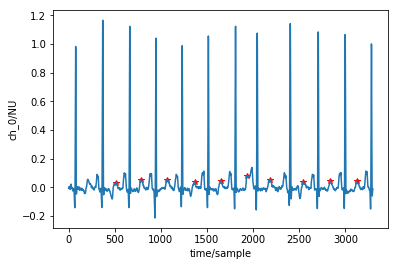

In [157]:
all_height_p = []
all_height_t = []
all_durations_p = []
all_durations_t = []

all_height_p_neg = []
all_height_t_neg = []
all_durations_p_neg = []
all_durations_t_neg = []

min_height = []
all_p_r_durations = []
all_r_t_durations = []
for patient in mitdb.patient_records:
    p_positives, p_negatives, p_properties, t_positives, t_negatives, t_properties = p_and_t_peak_properties_extractor(patient)
    p_height = np.asarray(p_properties["height"])
    t_height = np.asarray(t_properties["height"])
    all_height_p.extend(p_height[:,0])
    all_height_p_neg.extend(p_height[:,1])
    all_height_t.extend(t_height[:,0])
    all_height_t_neg.extend(t_height[:,1])
    
    
    p_duration = np.asarray(p_properties["durations"])
    t_duration= np.asarray(t_properties["durations"])
    all_durations_p.extend(p_duration[:,0])
    all_durations_t.extend(t_duration[:,0])
    all_durations_p_neg.extend(p_duration[:,1])
    all_durations_t_neg.extend(t_duration[:,1])







Patient file:  100 begins


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


Patient file:  101 begins
Patient file:  102 begins
Patient file:  103 begins
Patient file:  104 begins
Patient file:  105 begins
Patient file:  106 begins
Patient file:  107 begins
Patient file:  108 begins
Patient file:  109 begins
Patient file:  111 begins
Patient file:  112 begins
Patient file:  113 begins
Patient file:  114 begins
Patient file:  115 begins
Patient file:  116 begins
Patient file:  117 begins
Patient file:  118 begins
Patient file:  119 begins
Patient file:  121 begins
Patient file:  122 begins
Patient file:  123 begins
Patient file:  124 begins
Patient file:  200 begins
Patient file:  201 begins
Patient file:  202 begins
Patient file:  203 begins
Patient file:  205 begins
Patient file:  207 begins
Patient file:  208 begins
Patient file:  209 begins
Patient file:  210 begins
Patient file:  212 begins
Patient file:  213 begins
Patient file:  214 begins
Patient file:  215 begins
Patient file:  217 begins
Patient file:  219 begins
Patient file:  220 begins
Patient file

 
    """"
    for i in range(0, len(q_properties["height"])):
        
        q_r_durations = sub_signal_interval(patient.time, q_points[i], patient.segmented_R_pos[i] ,0)
        all_q_r_durations.append(q_r_durations)
        r_s_durations = sub_signal_interval(patient.time, patient.segmented_R_pos[i],  s_points[i] ,0)
        all_r_s_durations.append(r_s_durations)
        if(s_properties["durations"][i] > 0.15 ):
            print(patient.filename, s_points[i], s_properties["height"][i], i)
            min_height.append(r_s_durations)    
    """"

In [183]:

all_height_p = []
all_height_t = []
all_durations_p = []
all_durations_t = []

all_height_p_neg = []
all_height_t_neg = []
all_durations_p_neg = []
all_durations_t_neg = []

min_height = []
all_p_r_durations = []
all_r_t_durations = []
for patient in mitdb.patient_records:
    p_positives, p_negatives, p_properties, t_positives, t_negatives, t_properties = p_and_t_peak_properties_extractor(patient)
    p_height = np.asarray(p_properties["height"])
    t_height = np.asarray(t_properties["height"])
    
   
    
    
    p_duration = np.asarray(p_properties["durations"])
    t_duration= np.asarray(t_properties["durations"])
    print(len(p_positives),len(t_positives), len(p_negatives), len(t_negatives),len(patient.segmented_R_pos))
    
    for i in range(0,len(p_positives)):
        
        p_r_duration = sub_signal_interval(patient.time, int(p_positives[i]), int(patient.segmented_R_pos[i]),0)
        r_t_duration = sub_signal_interval(patient.time, int(patient.segmented_R_pos[i]), int(t_positives[i]),0)
        all_p_r_durations.append((patient.filename,p_positives[i],p_r_duration,i))
        all_r_t_durations.append((patient.filename, t_positives[i],r_t_duration,i))
        
        all_height_p.append((patient.filename,p_positives[i],p_height[:,0][i],i))
        all_height_t.append((patient.filename,t_positives[i],t_height[:,0][i],i))
        all_height_p_neg.append((patient.filename,p_negatives[i],p_height[:,1][i],i))
        all_height_t_neg.append((patient.filename,t_negatives[i],t_height[:,1][i],i))
        all_durations_p.append((patient.filename,p_positives[i],p_duration[:,0][i],i))
        all_durations_t.append((patient.filename,t_positives[i],t_duration[:,0][i],i))
        all_durations_p_neg.append((patient.filename,p_negatives[i],p_duration[:,1][i],i))
        all_durations_t_neg.append((patient.filename,t_negatives[i],t_duration[:,1][i],i))
        

Patient file:  100 begins


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


2271 2271 2271 2271 2271
Patient file:  101 begins
1872 1872 1872 1872 1872
Patient file:  102 begins
2189 2189 2189 2189 2189
Patient file:  103 begins
2089 2089 2089 2089 2089
Patient file:  104 begins
2308 2308 2308 2308 2308
Patient file:  105 begins
2690 2690 2690 2690 2690
Patient file:  106 begins
2097 2097 2097 2097 2097
Patient file:  107 begins
2138 2138 2138 2138 2138
Patient file:  108 begins
1822 1822 1822 1822 1822
Patient file:  109 begins
2532 2532 2532 2532 2532
Patient file:  111 begins
2132 2132 2132 2132 2132
Patient file:  112 begins
2547 2547 2547 2547 2547
Patient file:  113 begins
1793 1793 1793 1793 1793
Patient file:  114 begins
1889 1889 1889 1889 1889
Patient file:  115 begins
1959 1959 1959 1959 1959
Patient file:  116 begins
2419 2419 2419 2419 2419
Patient file:  117 begins
1537 1537 1537 1537 1537
Patient file:  118 begins
2299 2299 2299 2299 2299
Patient file:  119 begins
2093 2093 2093 2093 2093
Patient file:  121 begins
1873 1873 1873 1873 1873
Patien

In [ ]:
x ,y  = np.unique(all_height_p, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)
print(y[0])

48


In [84]:
patient = mitdb.patient_records[23]
q_points, q_properties,  s_points, s_properties = q_s_peak_properties_extractor(patient)

Patient file:  200 begins


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:133: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [90]:
#[630288, 630646, 631013, 631290, 631726]
#[630244, 630625, 630982, 631340, 631695]

starting_point = 18000
end_point = 19000
start_index = 77
end_index = 80
index = list(range(starting_point,end_point))
sig = patient.filtered_MLII[index]
annd = s_points[start_index:end_index]
transform_annd = [origin_to_new_point(starting_point,p)for p in annd]

transform_annd = np.asarray(transform_annd)


index = list(range(starting_point,end_point))
sig = patient.filtered_MLII[index]
annd = patient.segmented_R_pos[start_index:end_index]
r_peaks = [origin_to_new_point(starting_point,p)for p in annd]

r_peaks = np.asarray(r_peaks)

index = list(range(starting_point,end_point))
sig = patient.filtered_MLII[index]
annd = patient.annotated_R_poses[start_index+1:end_index+1]
r_peaks_ori = [origin_to_new_point(starting_point,p)for p in annd]

r_peaks_ori = np.asarray(r_peaks_ori)

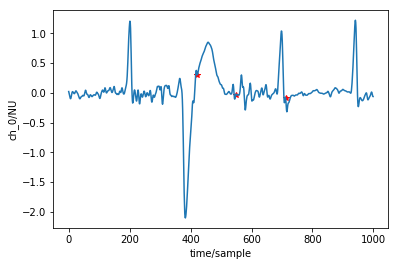

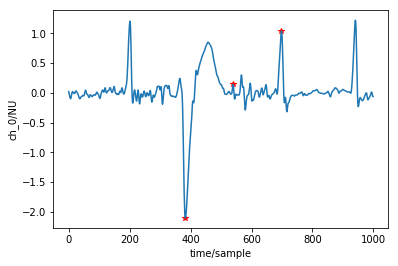

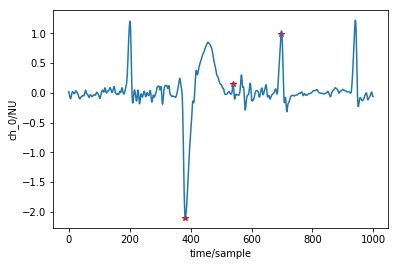

In [91]:
wfdb.plot_items(signal=sig, ann_samp=[transform_annd])
wfdb.plot_items(signal=sig, ann_samp=[r_peaks])
wfdb.plot_items(signal=sig, ann_samp=[r_peaks_ori])



In [21]:
patient = mitdb.patient_records[]


Patient file:  114 begins


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:129: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [85]:
print(s_points[77:80])
#patient.segmented_R_pos[1817:1822]

[18422, 18548, 18712]


In [ ]:
200 18548 0.312 78